### Loading the Required Libraries and Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

### Data preparation

In [2]:
df = pd.read_csv('tweets about MacDonald.csv')

In [3]:
df.columns = ["Index","tweets"]

In [4]:
df.shape

(10000, 2)

In [5]:
df.head()

,Index,tweets
0,0,@DouglasHepburn @Euan_MacDonald We’re saving U...
1,1,TOM MACDONALD AND ADAM CALHOUN - FIRE EMOJIS F...
2,2,@justicar5 @Euan_MacDonald deadly? Diabetes is...
3,3,@Euan_MacDonald Ok great !\nHurry up !
4,4,@peteandtomonso1 @jeanosis_ef @Euan_MacDonald ...


### Viewing the first 5 tweets

In [6]:
for i in range(0,5):
    print(df['tweets'][i])

@DouglasHepburn @Euan_MacDonald We’re saving Ukrainian lives.
TOM MACDONALD AND ADAM CALHOUN - FIRE EMOJIS FT MADCHILD | LYRIC VIDEO https://t.co/7z8bOl5Iih via @YouTube
@justicar5 @Euan_MacDonald deadly? Diabetes is killing 4x as many people each year. You know the numbers from vid d… https://t.co/fatwDeHMxn
@Euan_MacDonald Ok great !
Hurry up !
@peteandtomonso1 @jeanosis_ef @Euan_MacDonald @JuliaDavisNews Major LOLZ!!


### Cleaning data

In [7]:
def clean_txt(txt):
    # Creating a sublist of lower case words for each tweet
    txt = txt.lower()
    # Removing URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    txt = url_pattern.sub(r'', txt)
    # Removing mentions and tags
    txt = re.sub(r'\@\w+|\#',"", txt)
    # Rmoving puctuation
    punctuation = re.compile(r'[!"$%&\'()*+,-./:;<=>?\^_`{|}~|]')
    txt = punctuation.sub("",txt)
    return txt

In [8]:
df['tweets'] = df['tweets'].apply(clean_txt)

In [9]:
df.head()

,Index,tweets
0,0,we’re saving ukrainian lives
1,1,tom macdonald and adam calhoun fire emojis ft...
2,2,deadly diabetes is killing 4x as many people...
3,3,ok great \nhurry up
4,4,major lolz


In [10]:
df1 = pd.DataFrame(df["tweets"])

### Viewing the first 5 tweets

In [11]:
for i in range(0,5):
    print(df['tweets'][i])

  we’re saving ukrainian lives
tom macdonald and adam calhoun  fire emojis ft madchild  lyric video  via 
  deadly diabetes is killing 4x as many people each year you know the numbers from vid d… 
 ok great 
hurry up 
    major lolz


### Viewing the WordCloud

In [12]:
all_words = ' '.join([tweet for tweet in df['tweets']])

In [13]:
wordcloud = WordCloud(width=500, height=300, background_color="white").generate(all_words)

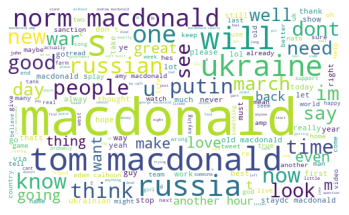

In [14]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Removing stopwords

In [15]:
stop_words = set(stopwords.words("english"))

In [16]:
def remove_stopwords(txt):
    # Tokenizing
    txt_tokens = word_tokenize(txt)
    # Removing stop words from each tweet list of word
    txt = [ word  for word in txt_tokens if word not in stop_words]
    return " ".join(txt)


### Transforming text to numeric vectors by the count vectorizer

In [17]:
# Loading dictionary
cvFile='Movie_Reviews.pkl'
# count_vect = CountVectorizer(decode_error="replace", vocabulary=pickle.load(open('Movie_Reviews.pkl', "rb")))
count_vect = pickle.load(open(cvFile, "rb"))


### Creating a pandas Dataframe of the vectorized text

In [18]:
df['tweets'] = df['tweets'].apply(remove_stopwords)

In [19]:
X_fresh = count_vect.transform(df['tweets']).toarray()
X_fresh.shape

(10000, 24280)

In [20]:
X_names = count_vect.get_feature_names()

In [21]:
X = pd.DataFrame(X_fresh,columns=X_names)

In [22]:
### Dimension of the Dataframe
X.shape

(10000, 24280)

### Making Predictions With Our MultinomialNB Model

In [23]:
import joblib
clf = joblib.load('Classifier_Movie_Reviews')

In [24]:
y_pred_new1 = clf.predict(X)

In [25]:
df = df1

### Creating labels

In [26]:
df['predicted_label'] = y_pred_new1.tolist()
df.head()

,tweets,predicted_label
0,we’re saving ukrainian lives,1
1,tom macdonald and adam calhoun fire emojis ft...,0
2,deadly diabetes is killing 4x as many people...,0
3,ok great \nhurry up,1
4,major lolz,0


### Vieing the labled dataframe

<AxesSubplot:xlabel='predicted_label', ylabel='count'>

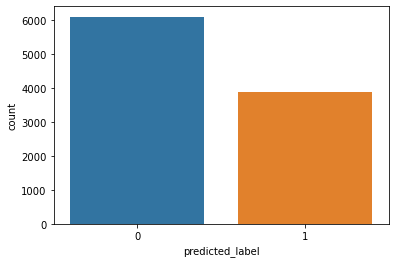

In [27]:
sns.countplot(x="predicted_label", data=df)